# **Satisfaction Analysis**

## Imports

In [129]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, isnan, when, count
import numpy as np
import seaborn as sns
import pandas as pd

## Démarrage Spark Session et récupération dataset

In [130]:
# Initialiser SparkSession
spark = SparkSession.builder \
        .appName("Airline Satisfaction Analysis") \
        .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")
# Récupération des données
df = spark.read.csv('dataset/Airline_customer_satisfaction.csv', header=True, inferSchema=True)
df.printSchema()

root
 |-- satisfaction: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- Online support: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Departure Delay in Minutes: inte

## **1. Répartition de la satisfaction**

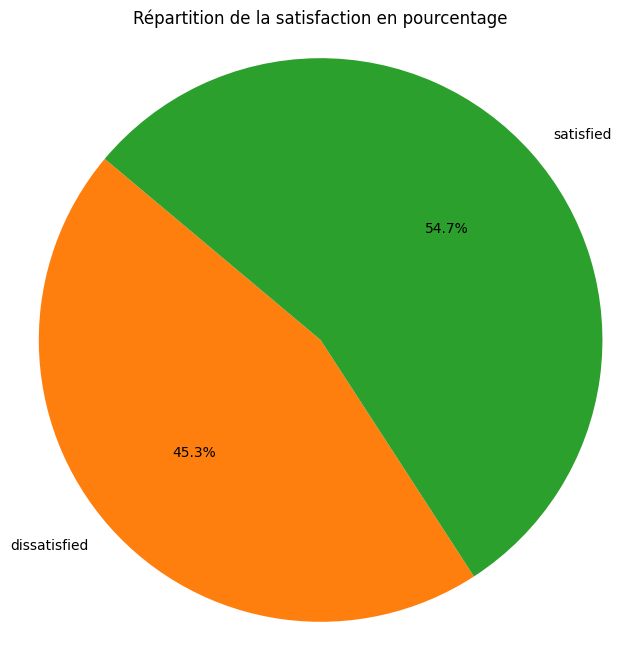

In [137]:
# Distribution de la satisfaction
satisfaction_dist = df.groupBy("satisfaction").count().toPandas()

# Calculer le pourcentage
total_count = satisfaction_dist['count'].sum()
satisfaction_dist['percentage'] = (satisfaction_dist['count'] / total_count) * 100

# Affichage
colors = ['#ff7f0e', '#2ca02c']
plt.figure(figsize=(8, 8))
plt.pie(
    satisfaction_dist['percentage'],
    labels=satisfaction_dist['satisfaction'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Répartition de la satisfaction en pourcentage")
plt.axis('equal')
plt.show()


## **2. Répartition des types de clients**

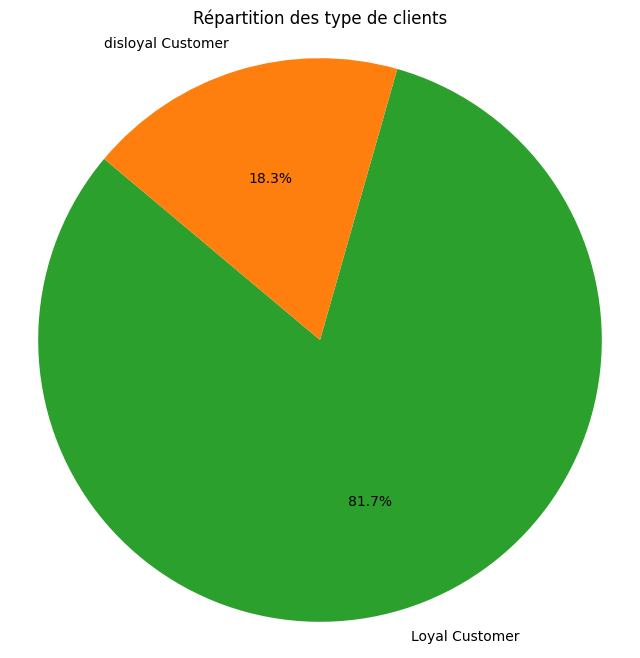

In [141]:
# Distribution des types de clients
customer_type_dist = df.groupBy("Customer Type").count().toPandas()

# Calculer le pourcentage
total_count = customer_type_dist['count'].sum()
customer_type_dist['percentage'] = (customer_type_dist['count'] / total_count) * 100

# Affichage
colors = ['#2ca02c', '#ff7f0e']
plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_dist['percentage'],
    labels=customer_type_dist['Customer Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Répartition des type de clients")
plt.axis('equal')
plt.show()

## **3. Distribution de l'âge**

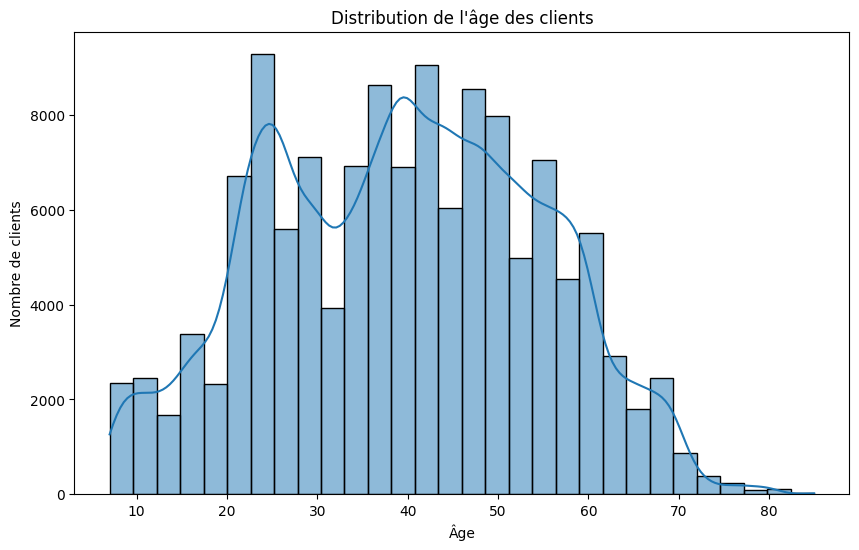

In [142]:
age_dist = df.select("Age").toPandas()

# Afficher l'histogramme de la distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(age_dist['Age'], bins=30, kde=True)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

## Distribution de la majorité entre 20 et 60 ans

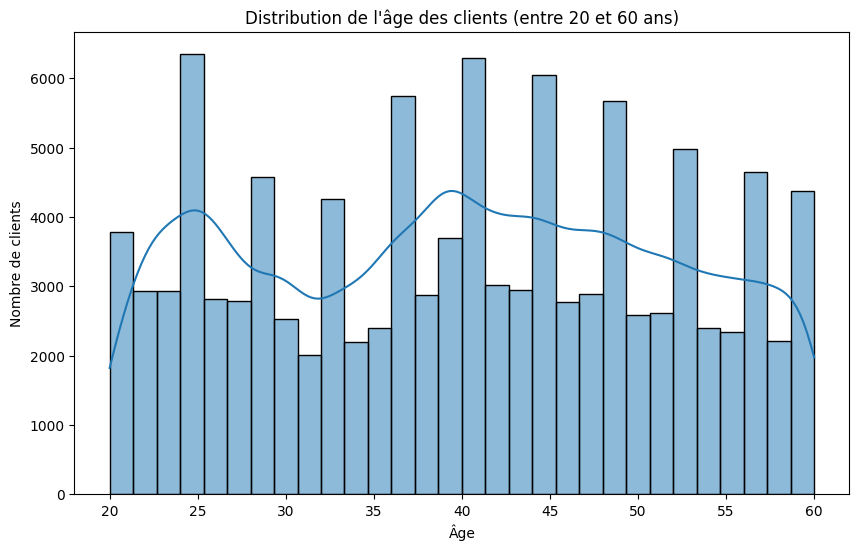

In [144]:
# Filtrer les données pour les âges entre 20 et 60 ans
age_filtered_df = df.filter((df.Age >= 20) & (df.Age <= 60))

# Sélectionner la colonne d'âge et convertir en DataFrame Pandas
age_dist_filtered = age_filtered_df.select("Age").toPandas()

# Afficher l'histogramme de la distribution de l'âge filtré
plt.figure(figsize=(10, 6))
sns.histplot(age_dist_filtered['Age'], bins=30, kde=True)
plt.title("Distribution de l'âge des clients (entre 20 et 60 ans)")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

## **4. Répartition satisfaction et type de clients (20 ans - 62 ans)**

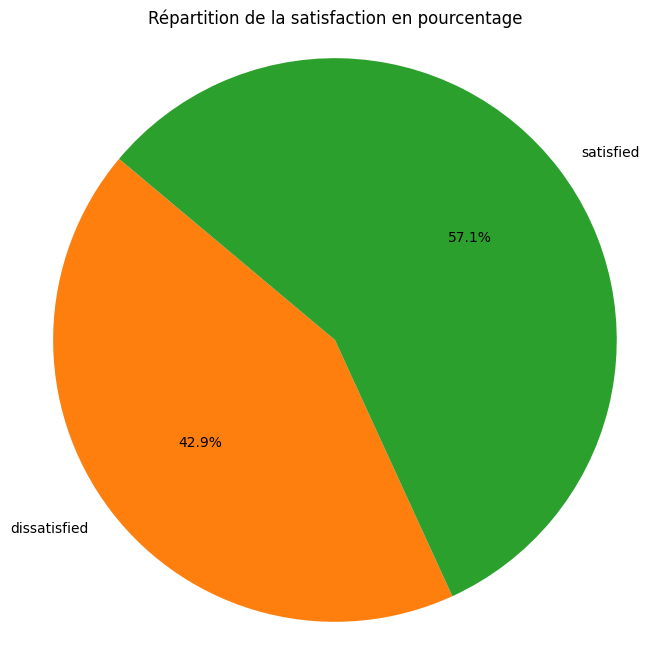

In [148]:
# Répartition de la satisfaction
filtered_satisfaction_dist = age_filtered_df.groupBy("satisfaction").count().toPandas()

# Calculer le pourcentage
total_count = filtered_satisfaction_dist['count'].sum()
filtered_satisfaction_dist['percentage'] = (filtered_satisfaction_dist['count'] / total_count) * 100

# Affichage
colors = ['#ff7f0e', '#2ca02c']
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_satisfaction_dist['percentage'],
    labels=filtered_satisfaction_dist['satisfaction'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Répartition de la satisfaction en pourcentage")
plt.axis('equal')
plt.show()

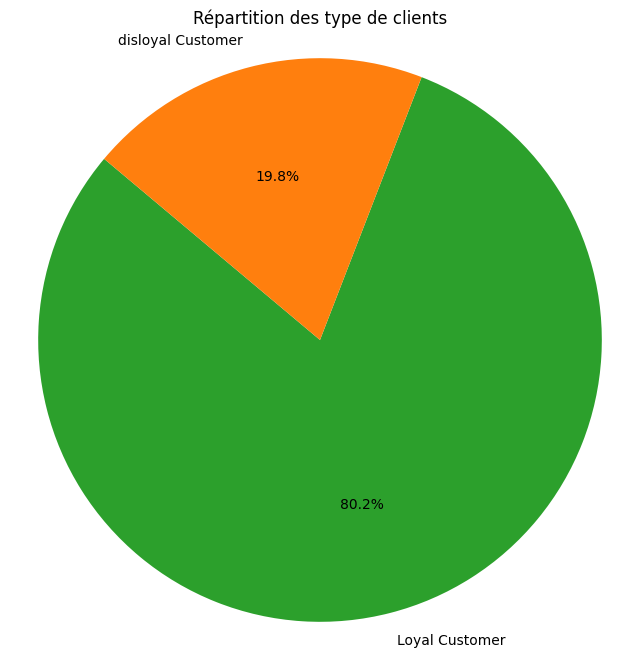

In [150]:
# Répartition des types de clients
filtered_customer_type_dist = age_filtered_df.groupBy("Customer Type").count().toPandas()

# Calculer le pourcentage
total_count = filtered_customer_type_dist['count'].sum()
filtered_customer_type_dist['percentage'] = (filtered_customer_type_dist['count'] / total_count) * 100

# Affichage
colors = ['#2ca02c', '#ff7f0e']
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_customer_type_dist['percentage'],
    labels=filtered_customer_type_dist['Customer Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Répartition des type de clients")
plt.axis('equal')  # Assurer que le graphique est en cercle
plt.show()

## **5. Analyse des clients LOYAUX**

In [152]:
loyal_customers_df = age_filtered_df.filter(age_filtered_df["Customer Type"] == "Loyal Customer")

## 5.1 Satisfaction par type de voyage

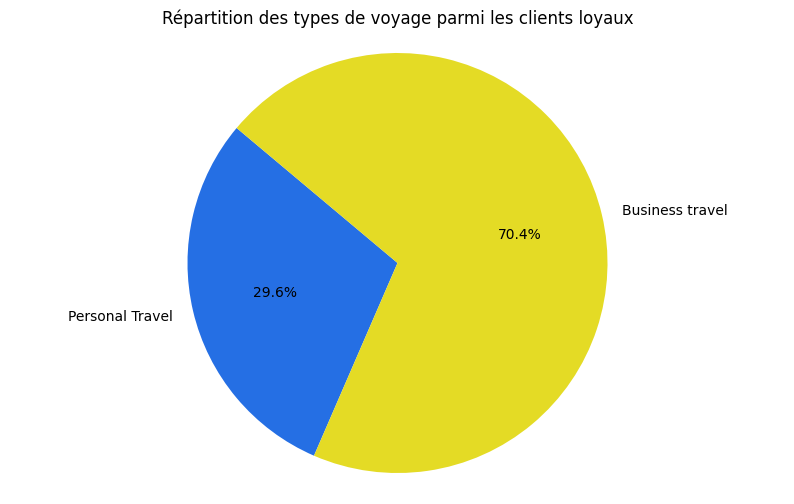

In [158]:
# Grouper par type de voyage
travel_type_dist = loyal_customers_df.groupBy("Type of Travel").count().toPandas()
travel_type_dist['percentage'] = (travel_type_dist['count'] / total_count) * 100

# Affichage
colors = ['#256FE4', '#E4DB25']
plt.figure(figsize=(10, 6))
plt.pie(
    travel_type_dist['percentage'],
    labels=travel_type_dist['Type of Travel'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Répartition des types de voyage parmi les clients loyaux")
plt.axis('equal')  # Assurer que le graphique est en cercle
plt.show()

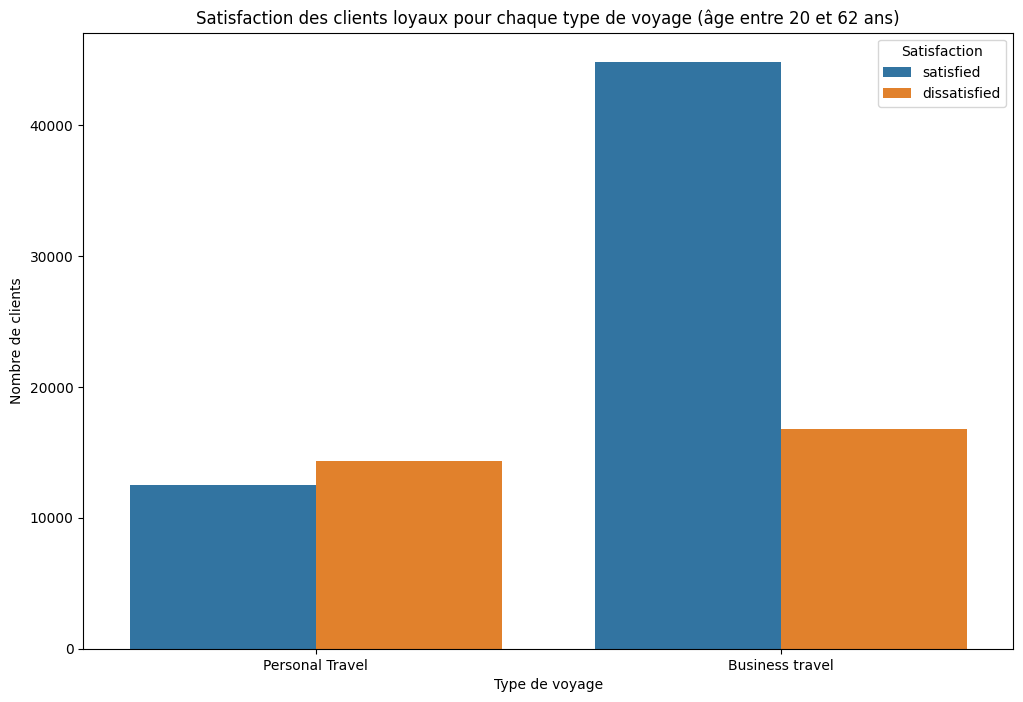

In [85]:
# Grouper par type de voyage et satisfaction
travel_satisfaction_dist = loyal_customers_df.groupBy("Type of Travel", "satisfaction").count().toPandas()

# Renommer les colonnes pour plus de clarté
travel_satisfaction_dist.columns = ['Type of Travel', 'Satisfaction', 'Count']

# Afficher le diagramme en barres groupées de la satisfaction des clients pour chaque type de voyage
plt.figure(figsize=(12, 8))
sns.barplot(x='Type of Travel', y='Count', hue='Satisfaction', data=travel_satisfaction_dist)
plt.title("Satisfaction des clients loyaux pour chaque type de voyage (âge entre 20 et 62 ans)")
plt.xlabel("Type de voyage")
plt.ylabel("Nombre de clients")
plt.legend(title='Satisfaction')
plt.show()

### 5.2 Satisfaction des clients loyaux voyageant pour affaire

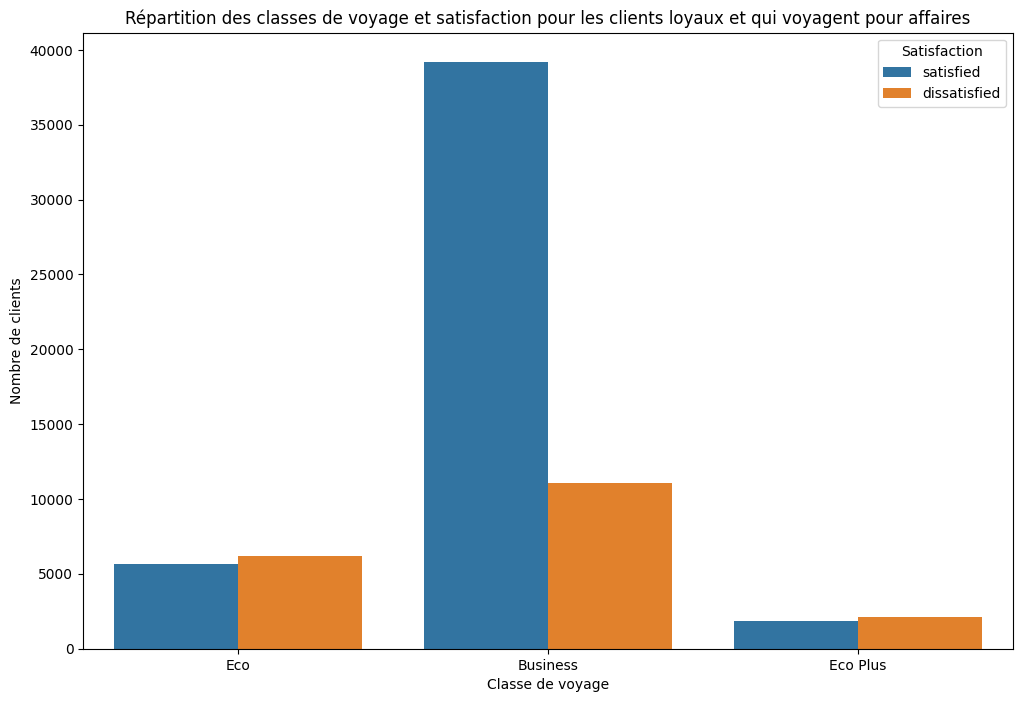

In [87]:
# Filtrer les données pour les clients loyaux et qui voyagent pour affaires
filtered_df = df.filter((df["Customer Type"] == "Loyal Customer") & (df["Type of Travel"] == "Business travel"))

# Calculer la répartition par classes de voyage
class_satisfaction_distribution = filtered_df.groupBy("Class", "satisfaction").count().toPandas()

# Afficher un diagramme en barres empilées pour visualiser la répartition par classes et satisfaction
plt.figure(figsize=(12, 8))
sns.barplot(x='Class', y='count', hue='satisfaction', data=class_satisfaction_distribution)
plt.title("Répartition des classes de voyage et satisfaction pour les clients loyaux et qui voyagent pour affaires")
plt.xlabel("Classe de voyage")
plt.ylabel("Nombre de clients")
plt.legend(title='Satisfaction')
plt.show()

### 5.3 Satisfaction des clients loyaux voyageant pour autre chose

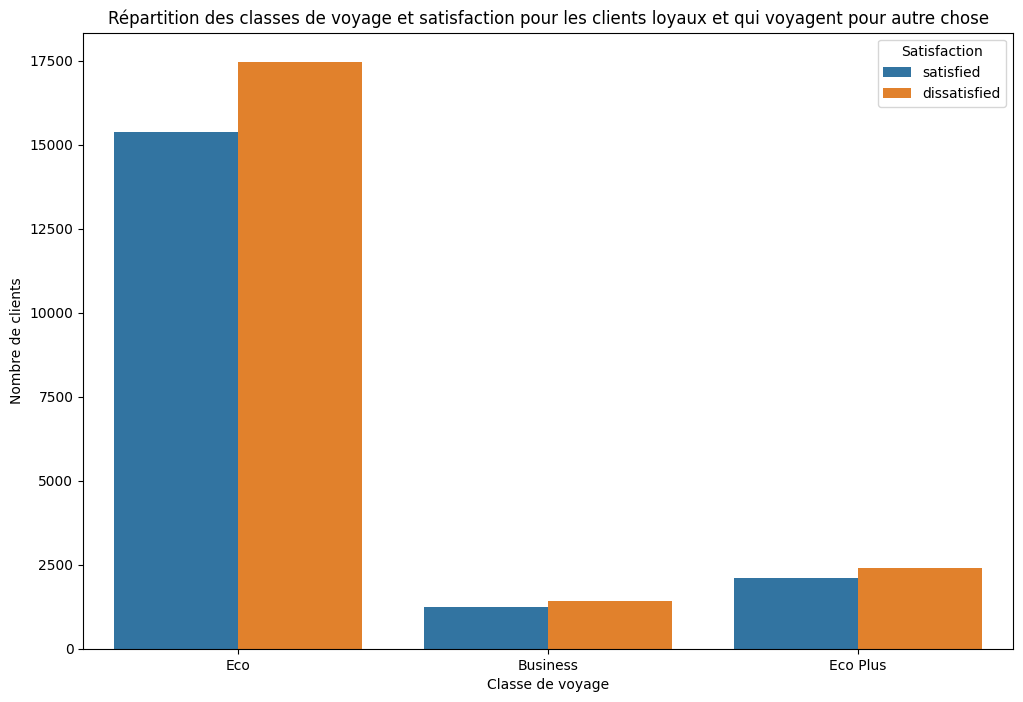

In [88]:
# Filtrer les données pour les clients loyaux et qui voyagent pour affaires
filtered_df = df.filter((df["Customer Type"] == "Loyal Customer") & (df["Type of Travel"] == "Personal Travel"))

# Calculer la répartition par classes de voyage
class_satisfaction_distribution = filtered_df.groupBy("Class", "satisfaction").count().toPandas()

# Afficher un diagramme en barres empilées pour visualiser la répartition par classes et satisfaction
plt.figure(figsize=(12, 8))
sns.barplot(x='Class', y='count', hue='satisfaction', data=class_satisfaction_distribution)
plt.title("Répartition des classes de voyage et satisfaction pour les clients loyaux et qui voyagent pour autre chose")
plt.xlabel("Classe de voyage")
plt.ylabel("Nombre de clients")
plt.legend(title='Satisfaction')
plt.show()

### 5.4 Focus sur la classe Eco

In [164]:
# filtered_df = df.filter((df["Customer Type"] == "Loyal Customer"))
filtered_df = df.filter((df["Customer Type"] == "Loyal Customer") & (df["Class"] == "Eco"))


In [165]:
# Séparer les clients satisfaits et insatisfaits
satisfied_df = filtered_df.filter(filtered_df["satisfaction"] == "satisfied")
dissatisfied_df = filtered_df.filter(filtered_df["satisfaction"] == "dissatisfied")

### Notes données aux services par les clients satisfaits

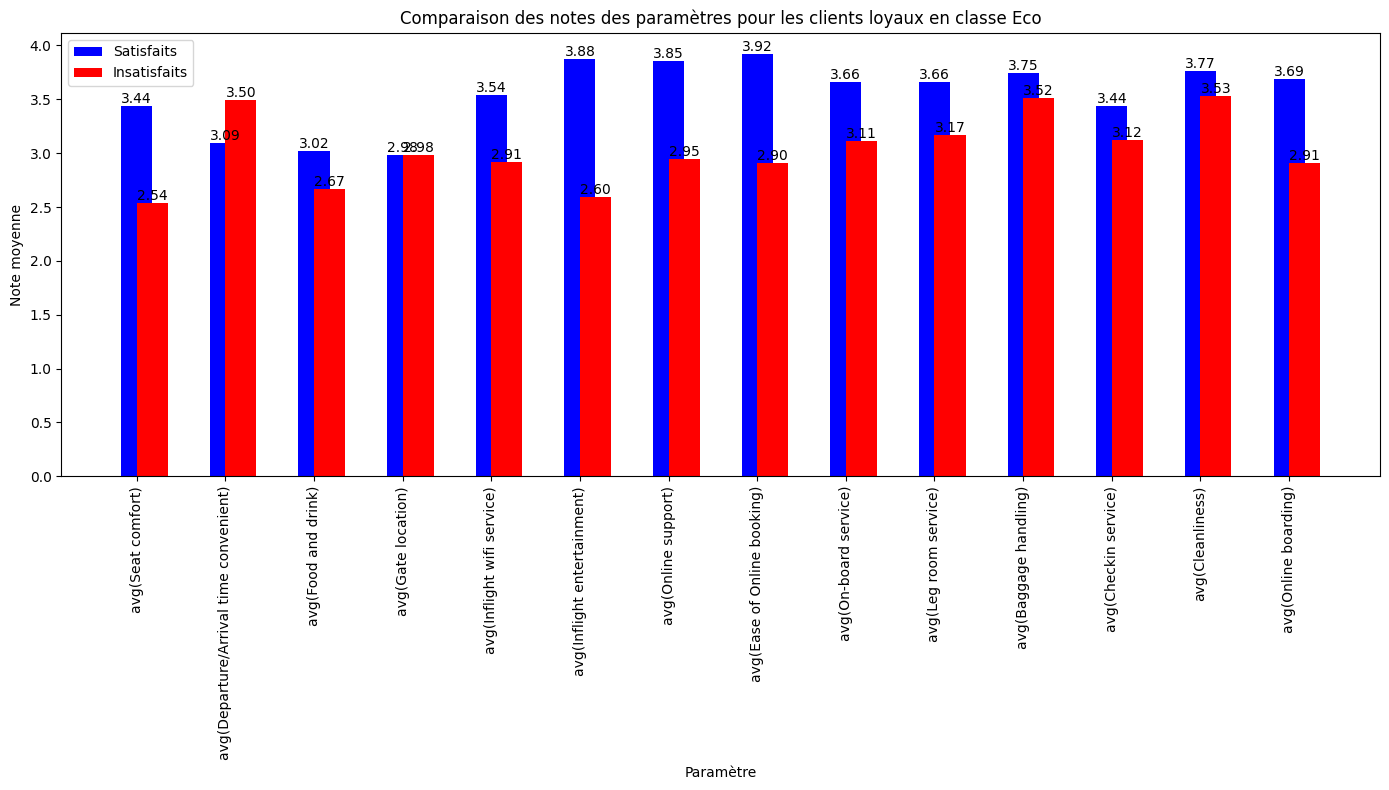

In [166]:
# Paramètres à analyser
parameters = ["Seat comfort", "Departure/Arrival time convenient", "Food and drink", 
              "Gate location", "Inflight wifi service", "Inflight entertainment", 
              "Online support", "Ease of Online booking", "On-board service", 
              "Leg room service", "Baggage handling", "Checkin service", 
              "Cleanliness", "Online boarding"]

# Calculer la moyenne des notes pour chaque paramètre pour les clients satisfaits
satisfied_means = satisfied_df.select(parameters).groupBy().mean().toPandas().transpose()
satisfied_means.columns = ['Satisfied']
satisfied_means['Parameter'] = satisfied_means.index

# Calculer la moyenne des notes pour chaque paramètre pour les clients insatisfaits
dissatisfied_means = dissatisfied_df.select(parameters).groupBy().mean().toPandas().transpose()
dissatisfied_means.columns = ['Dissatisfied']
dissatisfied_means['Parameter'] = dissatisfied_means.index

# Combiner les moyennes dans un seul DataFrame
means_df = pd.merge(satisfied_means, dissatisfied_means, on='Parameter')

# Afficher un diagramme en barres groupées comparant les moyennes des notes pour chaque paramètre
plt.figure(figsize=(14, 8))
bar_width = 0.35
bar1 = plt.bar(means_df['Parameter'], means_df['Satisfied'], width=bar_width, label='Satisfaits', color='b', align='center')
bar2 = plt.bar(means_df['Parameter'], means_df['Dissatisfied'], width=bar_width, label='Insatisfaits', color='r', align='edge')

plt.title("Comparaison des notes des paramètres pour les clients loyaux en classe Eco")
plt.xlabel("Paramètre")
plt.ylabel("Note moyenne")
plt.xticks(rotation=90)
plt.legend()

# Ajuster les étiquettes des barres
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Vérifier si ça se généralise

### 5.5 Distribution des distances de vols

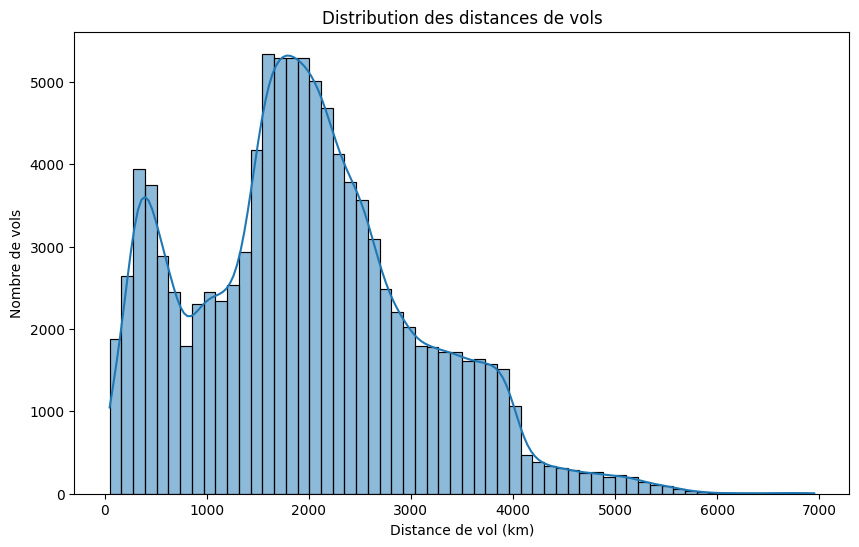

In [112]:
# Sélectionner la colonne des distances de vols et convertir en DataFrame Pandas
filtered_df = df.filter((df["Customer Type"] == "Loyal Customer"))
distance_dist = filtered_df.select("Flight Distance").toPandas()

# Afficher l'histogramme de la distribution des distances de vols
plt.figure(figsize=(10, 6))
sns.histplot(distance_dist['Flight Distance'], bins=60, kde=True)
plt.title("Distribution des distances de vols")
plt.xlabel("Distance de vol (km)")
plt.ylabel("Nombre de vols")
plt.show()

/tmp/ipykernel_343564/88497513.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_counts = df_pd.groupby(['Distance Bin', 'satisfaction']).size().unstack(fill_value=0)
/tmp/ipykernel_343564/88497513.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance Bin', y=satisfaction_percentage[0], data=satisfaction_percentage, palette="viridis")


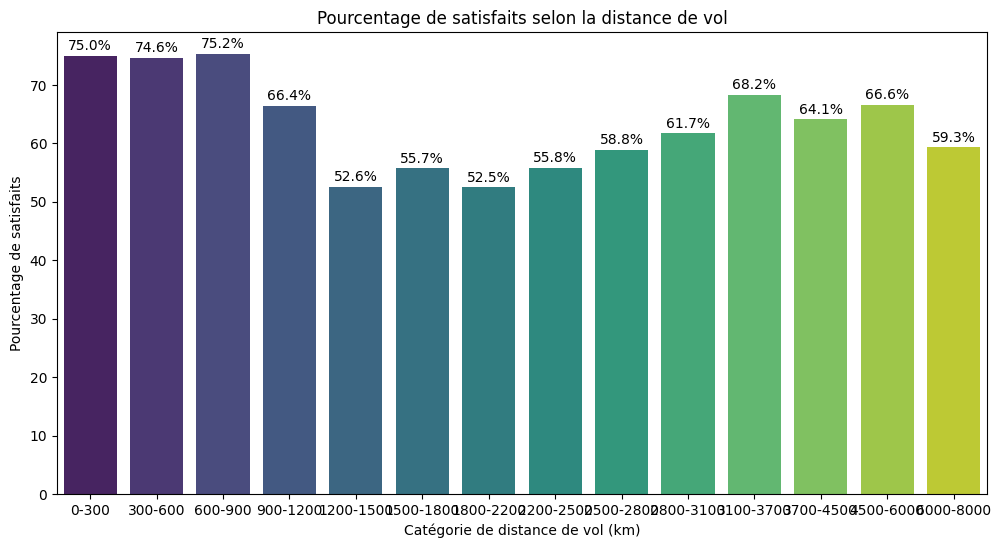

In [115]:
# Convertir en DataFrame Pandas pour faciliter la manipulation
# filtered_df = df.filter((df["Customer Type"] == "Loyal Customer") & (df["Class"] == "Eco"))
filtered_df = df.filter((df["Customer Type"] == "Loyal Customer"))
df_pd = filtered_df.select("Flight Distance", "satisfaction").toPandas()

# Supprimer les lignes avec des valeurs manquantes
df_pd.dropna(subset=["Flight Distance", "satisfaction"], inplace=True)

# Créer des bins pour l'histogramme
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2200, 2500, 2800, 3100, 4000, 5000, 6000, 8000]
labels = ['0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', 
          '1800-2200', '2200-2500', '2500-2800', '2800-3100', '3100-3700',
          '3700-4500', '4500-6000', '6000-8000']

# Ajouter une colonne pour les bins de distance de vol
df_pd['Distance Bin'] = pd.cut(df_pd['Flight Distance'], bins=bins, labels=labels)

# Calculer le nombre de clients satisfaits et total dans chaque bin
satisfaction_counts = df_pd.groupby(['Distance Bin', 'satisfaction']).size().unstack(fill_value=0)
total_counts = satisfaction_counts.sum(axis=1)

# Calculer le pourcentage de clients satisfaits dans chaque bin
satisfaction_percentage = (satisfaction_counts['satisfied'] / total_counts) * 100

# Convertir en DataFrame Pandas pour la visualisation
satisfaction_percentage = satisfaction_percentage.reset_index()

# Afficher un graphique en barres pour visualiser le pourcentage de satisfaits selon la distance de vol
plt.figure(figsize=(12, 6))
sns.barplot(x='Distance Bin', y=satisfaction_percentage[0], data=satisfaction_percentage, palette="viridis")
plt.title("Pourcentage de satisfaits selon la distance de vol")
plt.xlabel("Catégorie de distance de vol (km)")
plt.ylabel("Pourcentage de satisfaits")

# Ajouter les pourcentages au-dessus de chaque barre
for i in range(len(satisfaction_percentage)):
    plt.text(i, satisfaction_percentage[0][i] + 1, f'{satisfaction_percentage[0][i]:.1f}%', ha='center', color='black')

plt.show()

### 5.6 Satisfaction par paramètre selon la distance de vol

/tmp/ipykernel_343564/2324313211.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_satisfied = df_satisfied.groupby('Distance Bin')[params].mean().reset_index()
/tmp/ipykernel_343564/2324313211.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dissatisfied = df_dissatisfied.groupby('Distance Bin')[params].mean().reset_index()


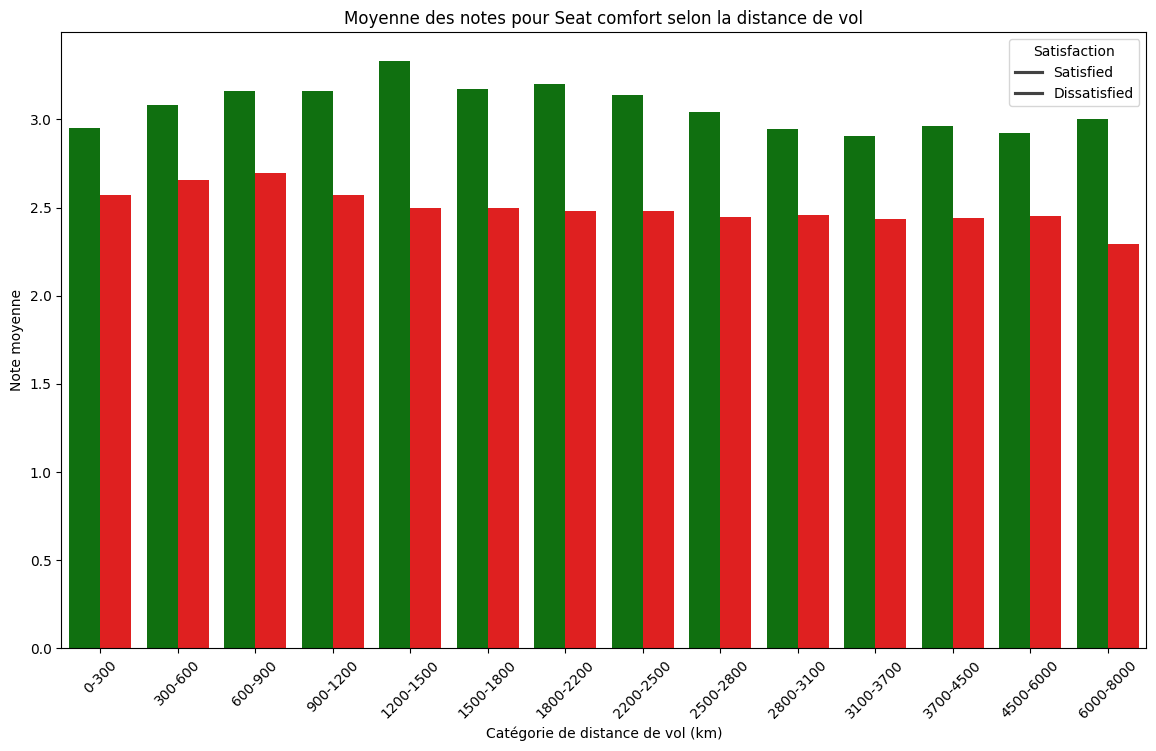

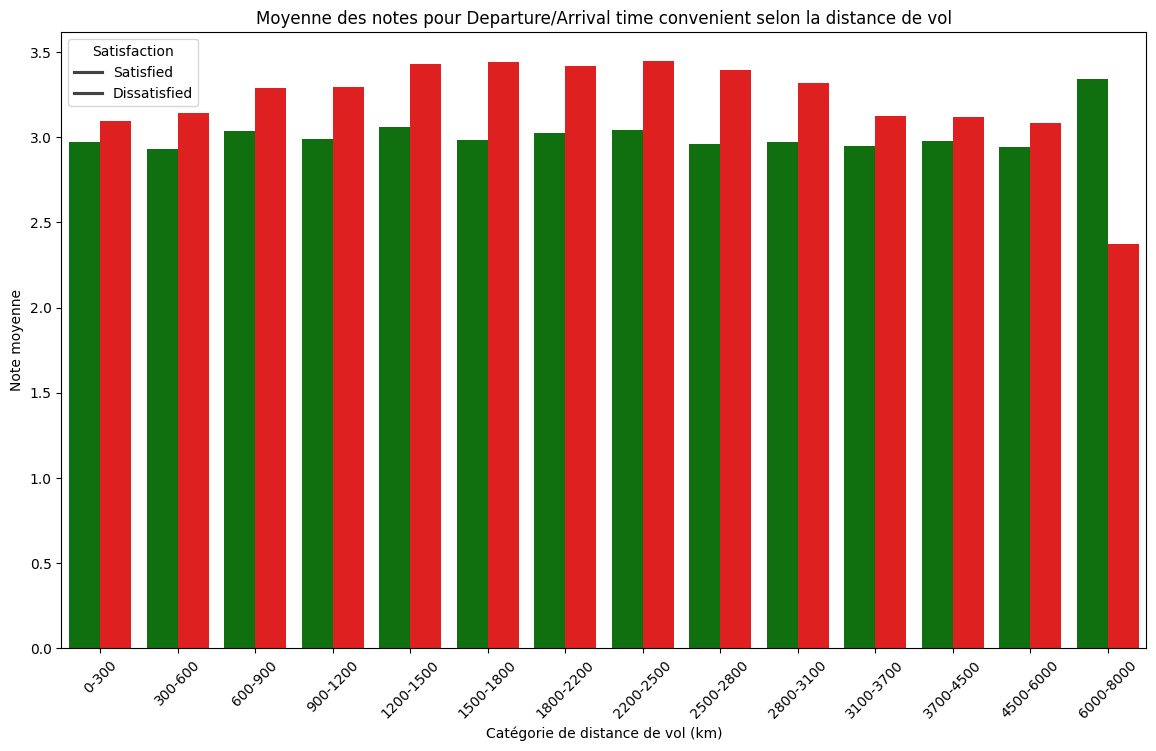

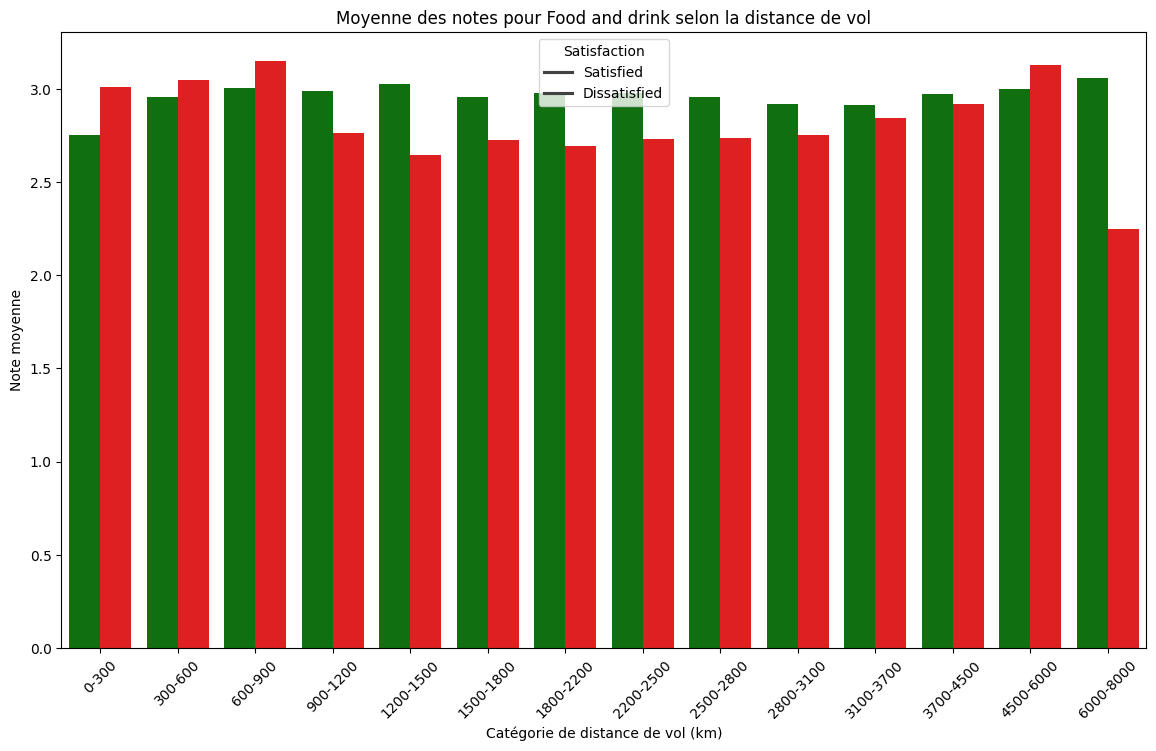

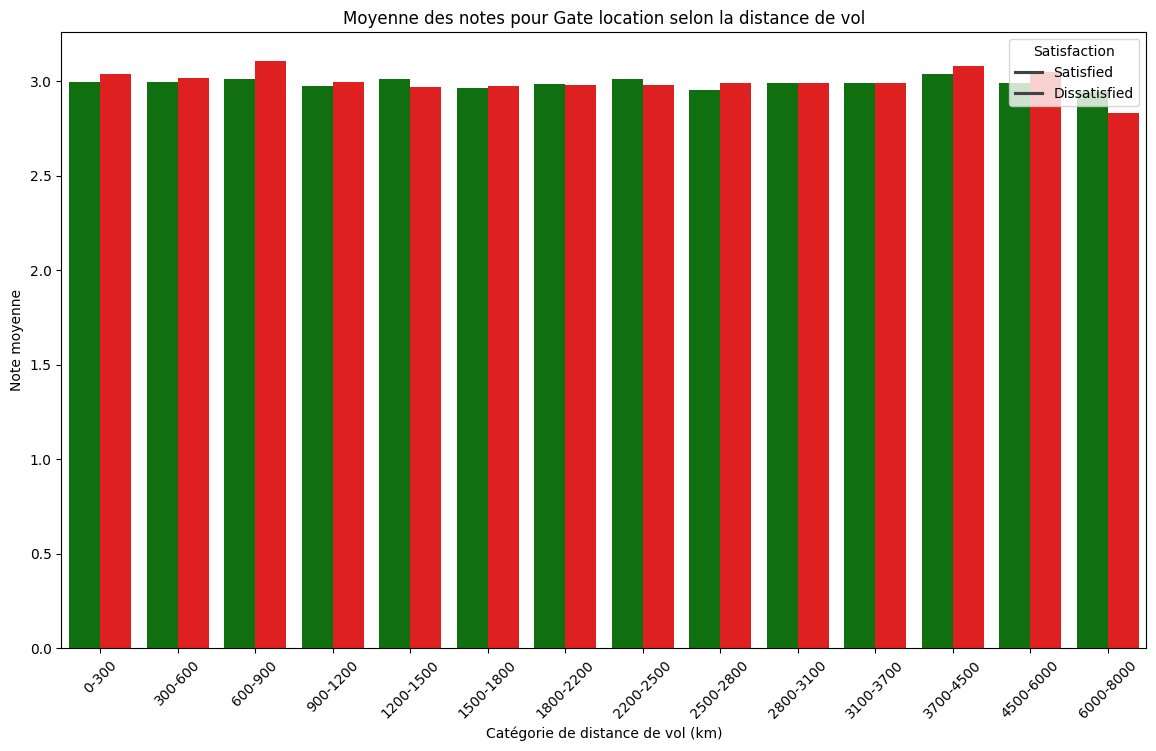

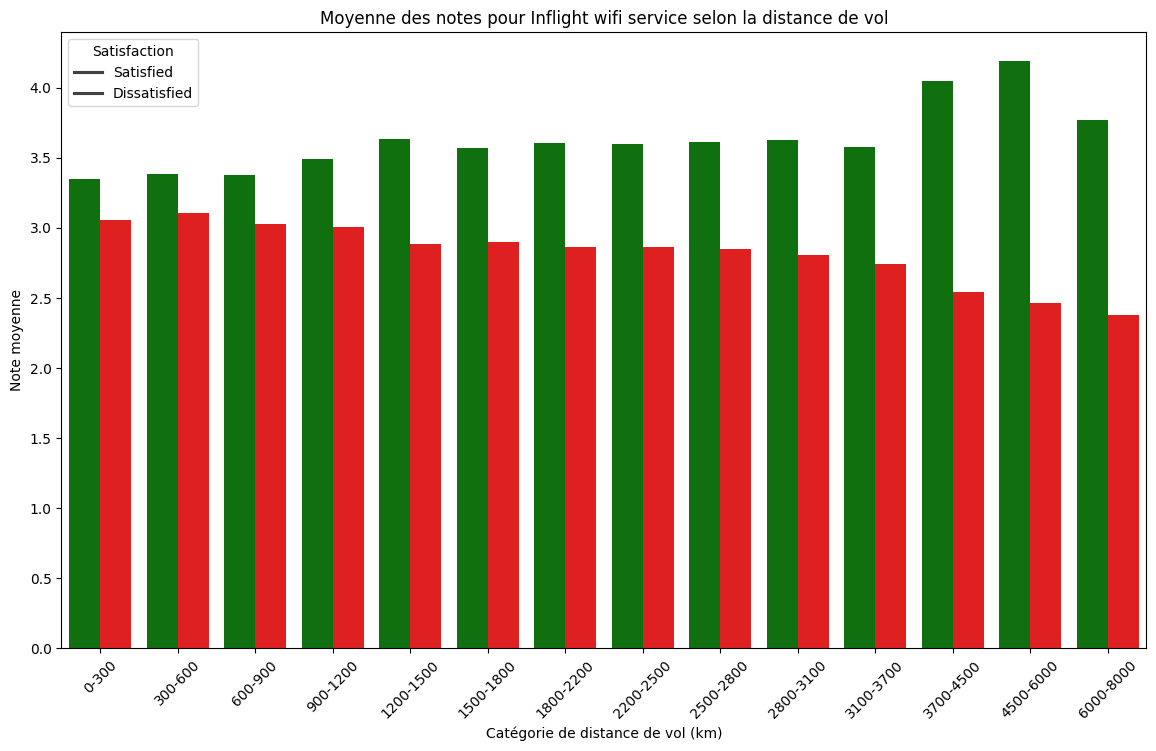

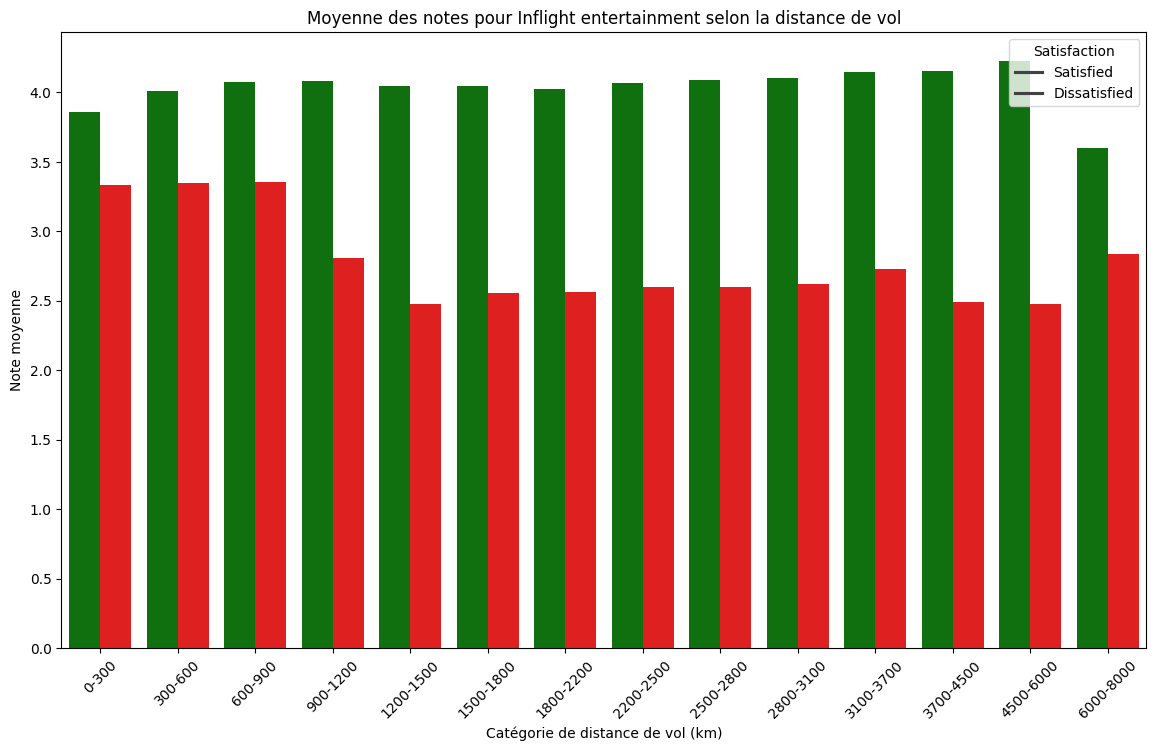

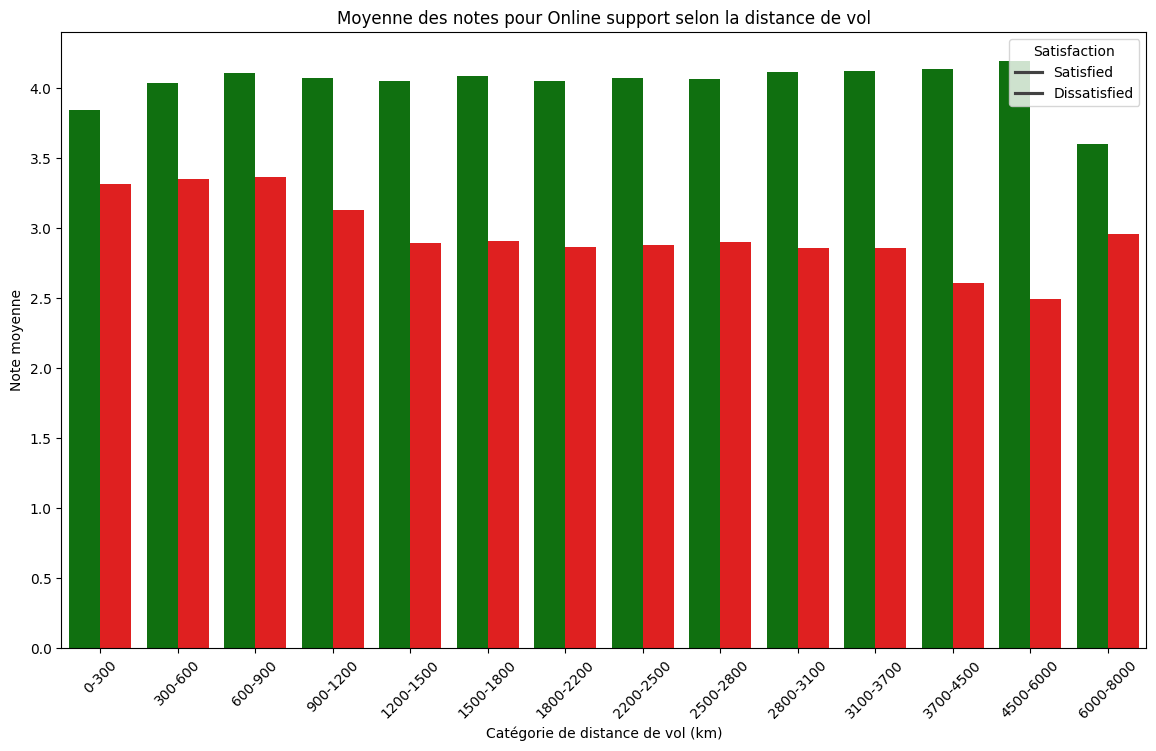

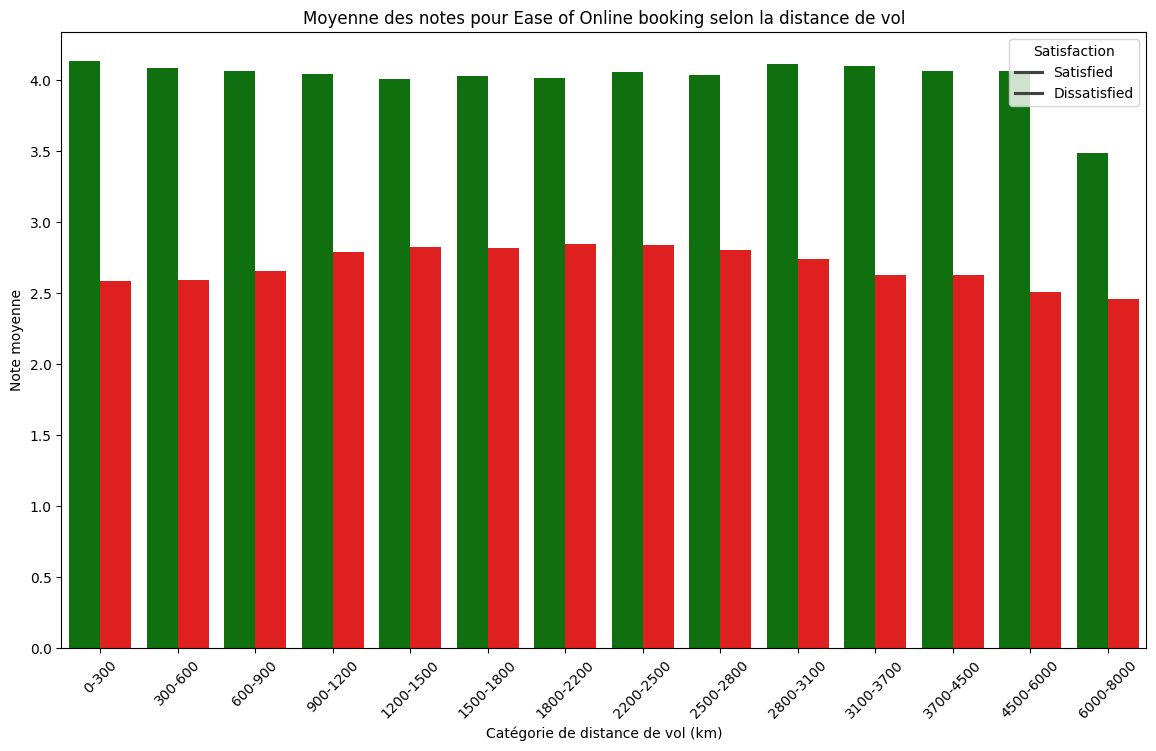

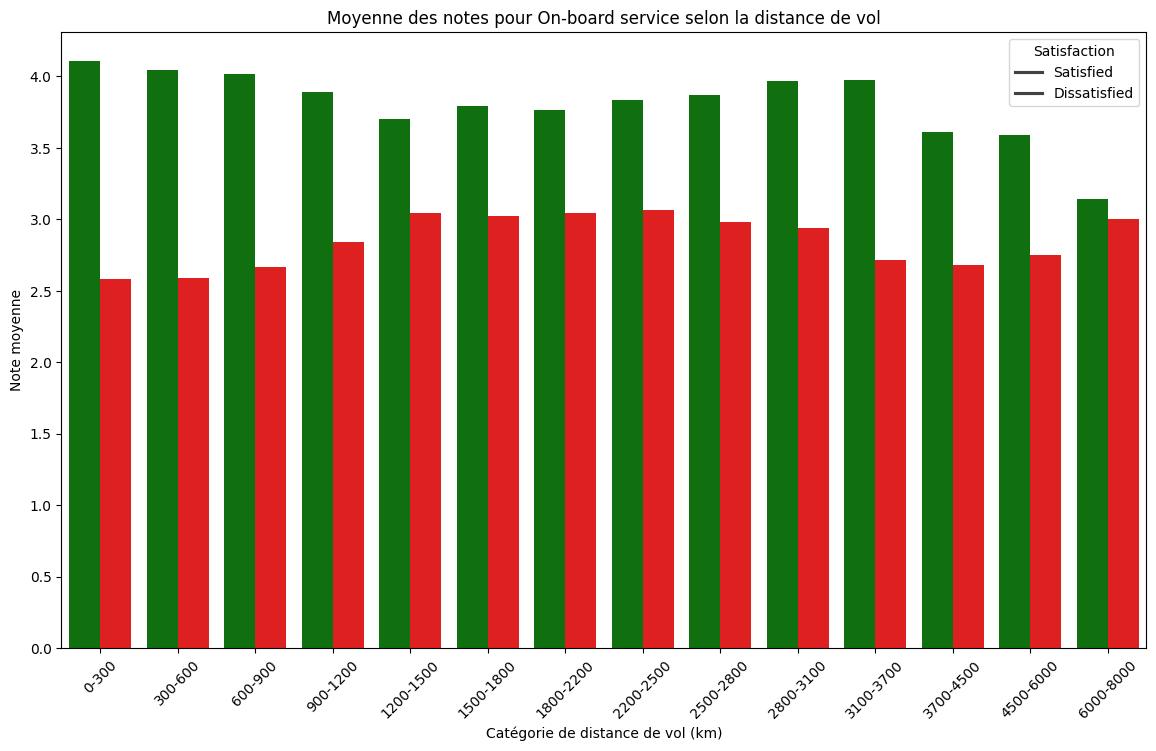

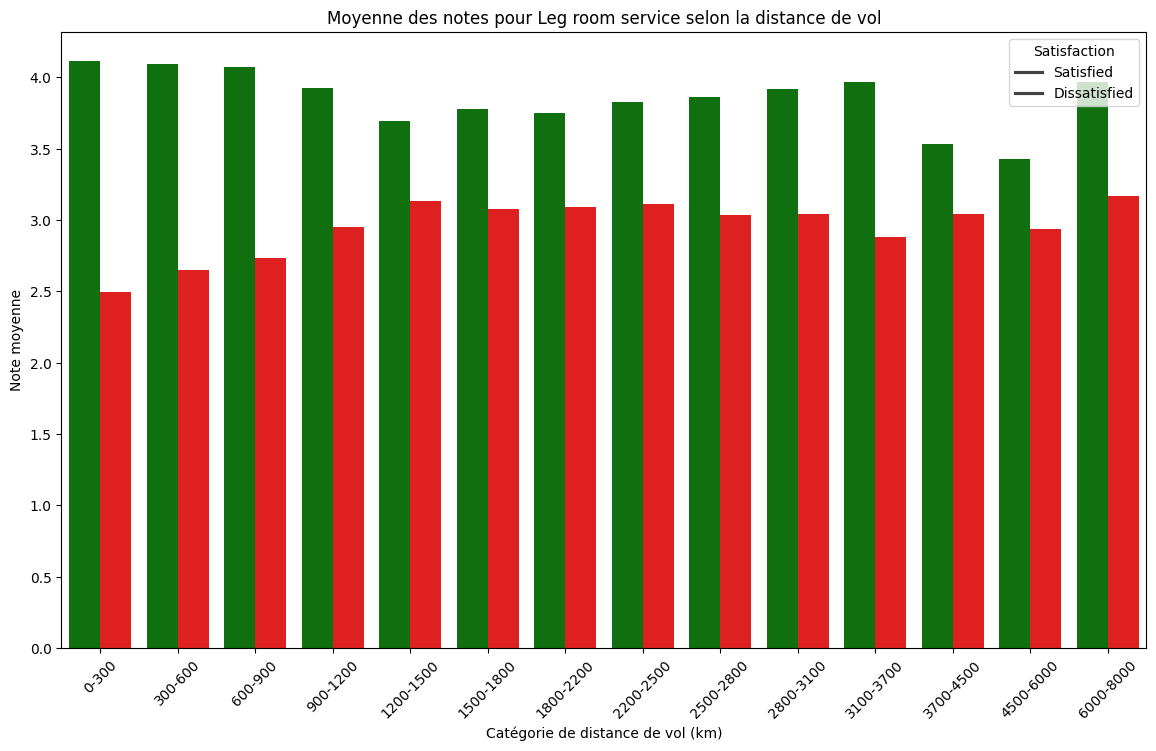

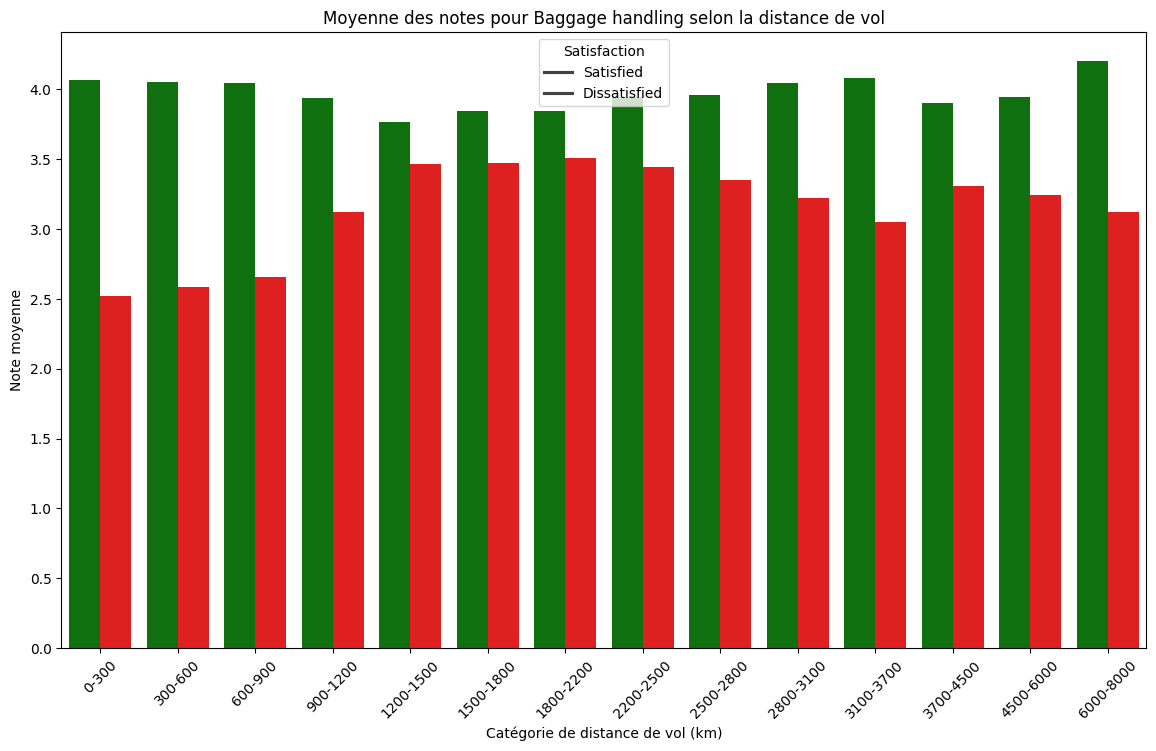

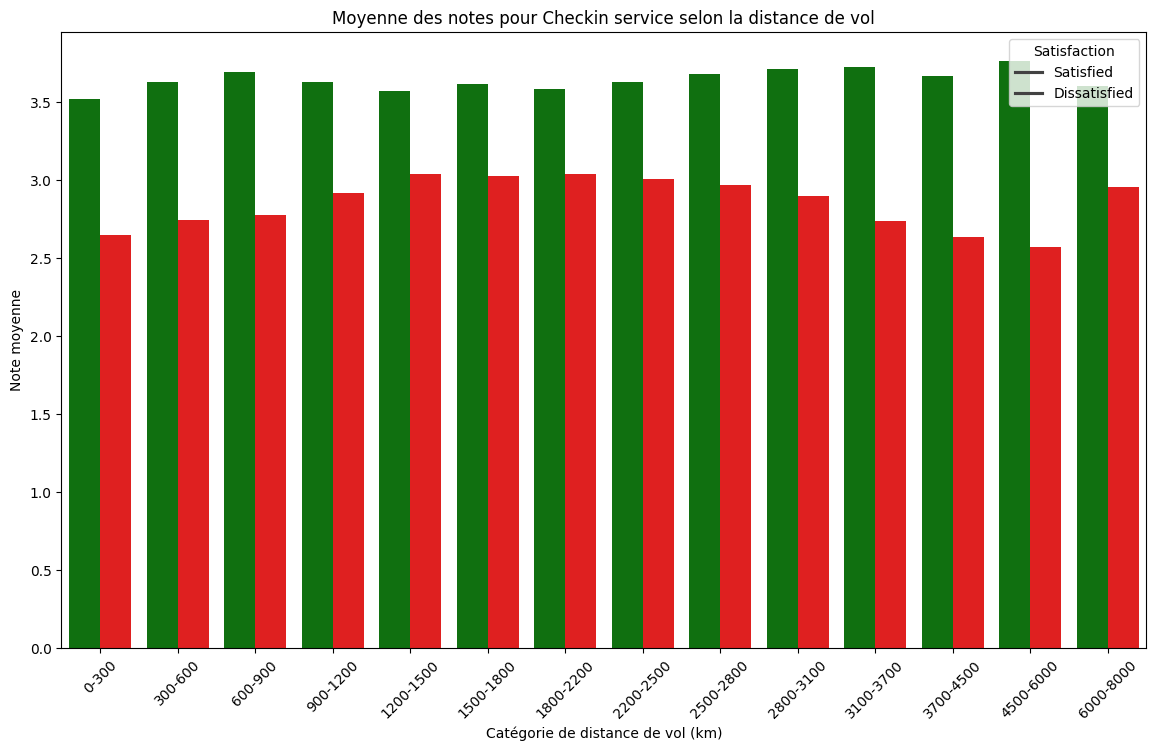

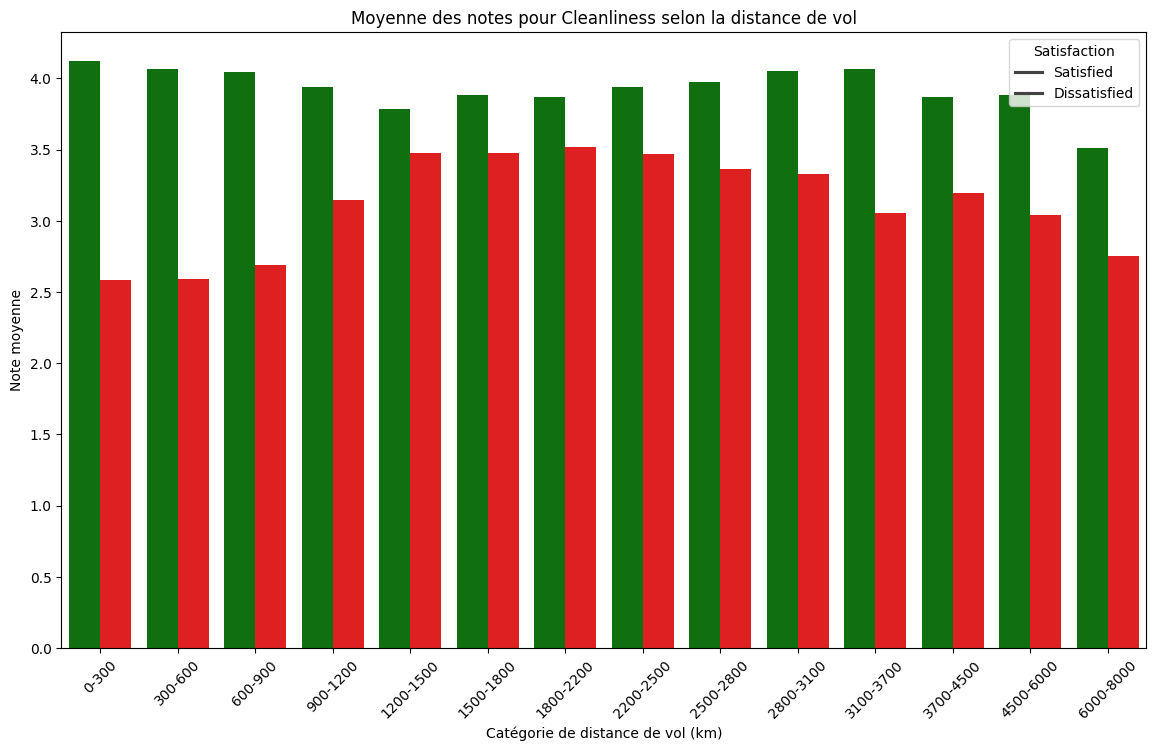

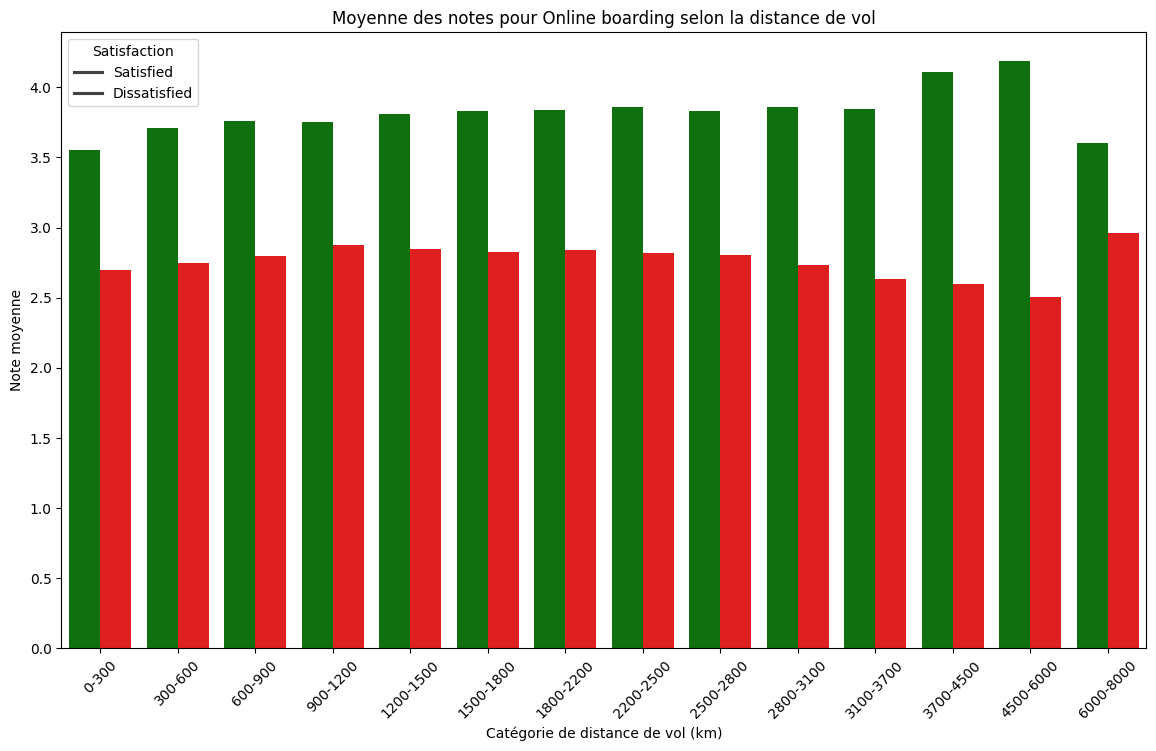

In [116]:
# Filtrer les clients loyaux
df_loyal = df.filter(col("Customer Type") == "Loyal Customer")

# Convertir en DataFrame Pandas pour faciliter la manipulation
df_loyal_pd = df_loyal.select("Flight Distance", "satisfaction", "Seat comfort", "Departure/Arrival time convenient", 
                              "Food and drink", "Gate location", "Inflight wifi service", "Inflight entertainment", 
                              "Online support", "Ease of Online booking", "On-board service", "Leg room service", 
                              "Baggage handling", "Checkin service", "Cleanliness", "Online boarding").toPandas()

# Supprimer les lignes avec des valeurs manquantes
df_loyal_pd.dropna(subset=["Flight Distance", "satisfaction"], inplace=True)

# Créer des bins pour la distance de vol
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2200, 2500, 2800, 3100, 4000, 5000, 6000, 8000]
labels = ['0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', 
          '1800-2200', '2200-2500', '2500-2800', '2800-3100', '3100-3700',
          '3700-4500', '4500-6000', '6000-8000']
df_loyal_pd['Distance Bin'] = pd.cut(df_loyal_pd['Flight Distance'], bins=bins, labels=labels, right=False)

# Séparer les clients satisfaits et insatisfaits
df_satisfied = df_loyal_pd[df_loyal_pd['satisfaction'] == 'satisfied']
df_dissatisfied = df_loyal_pd[df_loyal_pd['satisfaction'] == 'dissatisfied']

# Calculer les notes moyennes pour chaque paramètre et chaque bin
params = ["Seat comfort", "Departure/Arrival time convenient", "Food and drink", "Gate location", 
          "Inflight wifi service", "Inflight entertainment", "Online support", "Ease of Online booking", 
          "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Cleanliness", 
          "Online boarding"]

avg_satisfied = df_satisfied.groupby('Distance Bin')[params].mean().reset_index()
avg_dissatisfied = df_dissatisfied.groupby('Distance Bin')[params].mean().reset_index()

# Fusionner les deux DataFrames pour comparaison
avg_scores = pd.merge(avg_satisfied, avg_dissatisfied, on='Distance Bin', suffixes=('_satisfied', '_dissatisfied'))

# Afficher les résultats
for param in params:
    plt.figure(figsize=(14, 8))
    avg_scores_melted = avg_scores.melt(id_vars='Distance Bin', 
                                        value_vars=[f'{param}_satisfied', f'{param}_dissatisfied'],
                                        var_name='Satisfaction', value_name='Average Score')
    sns.barplot(x='Distance Bin', y='Average Score', hue='Satisfaction', data=avg_scores_melted, palette=['green', 'red'])
    plt.title(f"Moyenne des notes pour {param} selon la distance de vol")
    plt.xlabel("Catégorie de distance de vol (km)")
    plt.ylabel("Note moyenne")
    plt.legend(title='Satisfaction', labels=['Satisfied', 'Dissatisfied'])
    plt.xticks(rotation=45)
    plt.show()

### 6. Analyse des clients NON-LOYAUX

In [127]:
disloyal_customers_df = df.filter((df.Age >= 20) & (df.Age <= 62) & (filtered_df["Customer Type"] == "disloyal Customer"))
# disloyal_customers_df = filtered_df.filter(filtered_df["Customer Type"] == "disloyal Customer")

### 6.1 Satisfaction par type de voyage

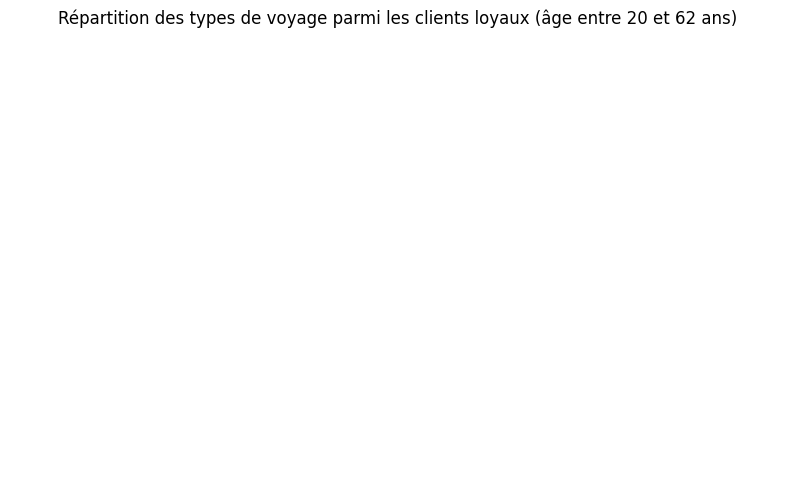

In [128]:
# Grouper par type de voyage et compter
travel_type_dist = loyal_customers_df.groupBy("Type of Travel").count().toPandas()
travel_type_dist['percentage'] = (travel_type_dist['count'] / total_count) * 100

# Afficher le diagramme en barres de la répartition des types de voyage parmi les clients loyaux
plt.figure(figsize=(10, 6))
plt.pie(travel_type_dist['percentage'], labels=travel_type_dist['Type of Travel'], autopct='%1.1f%%', startangle=140)
plt.title("Répartition des types de voyage parmi les clients loyaux (âge entre 20 et 62 ans)")
plt.axis('equal')  # Assurer que le graphique est en cercle
plt.show()